# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [93]:
#https://stackoverflow.com/questions/23853553/python-pandas-how-to-read-only-first-n-rows-of-csv-files-in/23853569

project_data = pd.read_csv('train_data.csv',nrows = 30000)
resource_data = pd.read_csv('resources.csv')

In [94]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (30000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [95]:
project_data = project_data[pd.notnull(project_data['teacher_prefix'])]

In [96]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [97]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 preprocessing of `project_subject_subcategories`

In [98]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [99]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

In [100]:
Y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)

X = project_data


In [101]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)
#X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.3, stratify=Y_train)

## 1.3 Text preprocessing

In [102]:
# merge two column text dataframe: 
X["essay"] = X["project_essay_1"].map(str) +\
             X["project_essay_2"].map(str) + \
             X["project_essay_3"].map(str) + \
             X["project_essay_4"].map(str)

In [103]:
X.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects              clean_categories  \
0                                             0             Literacy_Language   
1                                             7  History_Civics Health_Sports   

            clean_subcategories  \
0                  ESL Literacy   
1  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [104]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [105]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [106]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [107]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My wonderful students are 3, 4, and 5 years old.  We are located in a small town outside of Charlotte, NC.  All of my 22 students are children of school district employees.\r\nMy students are bright, energetic, and they love to learn!  They love hands-on activities that get them moving.  Like most preschoolers, they enjoy music and creating different things. \r\nAll of my students come from wonderful families that are very supportive of our classroom.  Our parents enjoy watching their children is growth as much as we do!These materials will help me teach my students all about the life cycle of a butterfly.  We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis.  After a few weeks they will emerge from the chrysalis as beautiful butterflies!  We already have a net for the chrysalises, but we still need the caterpillars and feeding station.\r\nThis will be an unforgettable experience for my students.  My student absolutely love hands-on materials.  They lea

In [108]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My wonderful students are 3, 4, and 5 years old.  We are located in a small town outside of Charlotte, NC.  All of my 22 students are children of school district employees.  My students are bright, energetic, and they love to learn!  They love hands-on activities that get them moving.  Like most preschoolers, they enjoy music and creating different things.   All of my students come from wonderful families that are very supportive of our classroom.  Our parents enjoy watching their children is growth as much as we do!These materials will help me teach my students all about the life cycle of a butterfly.  We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis.  After a few weeks they will emerge from the chrysalis as beautiful butterflies!  We already have a net for the chrysalises, but we still need the caterpillars and feeding station.  This will be an unforgettable experience for my students.  My student absolutely love hands-on materials.  They learn so 

In [109]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My wonderful students are 3 4 and 5 years old We are located in a small town outside of Charlotte NC All of my 22 students are children of school district employees My students are bright energetic and they love to learn They love hands on activities that get them moving Like most preschoolers they enjoy music and creating different things All of my students come from wonderful families that are very supportive of our classroom Our parents enjoy watching their children is growth as much as we do These materials will help me teach my students all about the life cycle of a butterfly We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis After a few weeks they will emerge from the chrysalis as beautiful butterflies We already have a net for the chrysalises but we still need the caterpillars and feeding station This will be an unforgettable experience for my students My student absolutely love hands on materials They learn so much from getting to touch and man

In [110]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [111]:
project_grade_category = []

for i in tqdm(project_data["project_grade_category"].values) :
    sent = decontracted(i)
    sent = sent.replace('Grades','')
    sent = sent.replace(' ','')
    sent = sent.replace('-','_')
    
    project_grade_category.append(sent.lower().strip())
    
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data['project_grade_category'] = project_grade_category

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 29999/29999 [00:01<00:00, 25665.79it/s]


In [112]:
teacher_prefix = []

for i in tqdm(project_data["teacher_prefix"].values) :
    sent = decontracted(i)
    sent = sent.replace('.','')
    
    
    teacher_prefix.append(sent.lower().strip())
    
project_data.drop(['teacher_prefix'], axis=1, inplace=True)
project_data['teacher_prefix'] = teacher_prefix

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 29999/29999 [00:01<00:00, 27006.90it/s]


In [113]:
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data['project_grade_category'] = project_grade_category

In [114]:
project_data.drop(['teacher_prefix'], axis=1, inplace=True)
project_data['teacher_prefix'] = teacher_prefix

In [115]:
project_data['project_is_approved'] = Y
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects              clean_categories  \
0                                             0             Literacy_Language   
1                                             7  History_Civics Health_Sports   

            clean_subcategories  \
0                  ESL Literacy   
1  Civics_Government TeamSports   

                                               essay project_grade_category  \
0  My students are English learners that are work...                 prek_2   
1  Our students arrive to our school eager to lea...                    6_8   

  teacher_prefix  project_is_approved  
0            mrs                    0  
1             mr                    1

In [116]:
val_accepted = project_data.loc[project_data['project_is_approved'] == 1]
val_rejected = project_data.loc[project_data['project_is_approved'] == 0]

## Response encoding for clean_categories

In [117]:
clean_categories_a = {}
clean_categories_r = {}
clean_categories_t = {}

for i in val_accepted['clean_categories']:
    for a in i.split():
        
        if a not in clean_categories_a:
            clean_categories_a[a] = 1
        else:
            clean_categories_a[a] += 1
        
for i in val_rejected['clean_categories']:
    for a in i.split():
        if a not in clean_categories_r:
            clean_categories_r[a] = 1
        else:
            clean_categories_r[a] += 1
        
for i in project_data['clean_categories']:
    for a in i.split():
        if a not in clean_categories_t:
            clean_categories_t[a] = 1
        else:
            clean_categories_t[a] += 1
        


In [118]:
prob_accepted = {}
prob_rejected = {}

for key in clean_categories_t:
    if key in clean_categories_a:
        prob_accepted[key] = float(clean_categories_a[key]/clean_categories_t[key])
    else:
        pass
    
for key in clean_categories_t:
    if key in clean_categories_r:
        prob_rejected[key] = float(clean_categories_r[key]/clean_categories_t[key])
    else:
        pass
        
    

In [119]:
print(prob_accepted)

{'Literacy_Language': 0.8640891675374434, 'History_Civics': 0.8578648136449779, 'Health_Sports': 0.8376722817764165, 'Math_Science': 0.8397101705398957, 'SpecialNeeds': 0.8211143695014663, 'AppliedLearning': 0.8230586840545346, 'Music_Arts': 0.8403954802259888, 'Warmth': 0.9166666666666666, 'Care_Hunger': 0.9166666666666666}


In [120]:
print(prob_rejected)

{'Literacy_Language': 0.1359108324625566, 'History_Civics': 0.14213518635502212, 'Health_Sports': 0.16232771822358347, 'Math_Science': 0.16028982946010426, 'SpecialNeeds': 0.17888563049853373, 'AppliedLearning': 0.17694131594546533, 'Music_Arts': 0.1596045197740113, 'Warmth': 0.08333333333333333, 'Care_Hunger': 0.08333333333333333}


In [121]:
cat_r = []
cat_a = []

for i in project_data['clean_categories']:
    a= i.split() 
   
    if len(a) == 1:
            
        cat_a.append(prob_accepted[i])
            
        cat_r.append(prob_rejected[i])
             
    else:
            
        
        cat_a.append(prob_accepted[a[0]]*prob_accepted[a[1]])
        cat_r.append(prob_rejected[a[0]]*prob_rejected[a[1]])
   
    

In [122]:
project_data['cat_r'] = cat_r
project_data['cat_a'] = cat_a

## Clean_subcategories 

In [123]:
clean_subcategories_a = {}
clean_subcategories_r = {}
clean_subcategories_t = {}

for i in val_accepted['clean_subcategories']:
    for a in i.split():
        if a not in clean_subcategories_a:
            clean_subcategories_a[a] = 1
        else:
            clean_subcategories_a[a] += 1

for i in val_rejected['clean_subcategories']:
    for a in i.split():
        if a not in clean_subcategories_r:
            clean_subcategories_r[a] = 1
        else:
            clean_subcategories_r[a] += 1

for i in project_data['clean_subcategories']:
    for a in i.split():
        if a not in clean_subcategories_t:
            clean_subcategories_t[a] = 1
        else:
            clean_subcategories_t[a] += 1 
    


In [124]:
sub_prob_accepted = {}
sub_prob_rejected = {}

for key in clean_subcategories_t:
    if key in clean_subcategories_a:
         sub_prob_accepted[key] = float(clean_subcategories_a[key]/clean_subcategories_t[key])
    else:
        pass
    
for key in clean_subcategories_t:
    if key in clean_subcategories_r:
        sub_prob_rejected[key] = float(clean_subcategories_r[key]/clean_subcategories_t[key])
    else:
        pass
        



In [125]:
sub_cat_r = []
sub_cat_a = []

for i in project_data['clean_subcategories']:
    a= i.split() 
   
    if len(a) == 1:
            
        sub_cat_a.append(sub_prob_accepted[i])
            
        sub_cat_r.append(sub_prob_rejected[i])
             
    else:
            
        
        sub_cat_a.append(sub_prob_accepted[a[0]]*sub_prob_accepted[a[1]])
        sub_cat_r.append(sub_prob_rejected[a[0]]*sub_prob_rejected[a[1]])

In [126]:
project_data['sub_cat_r'] = sub_cat_r
project_data['sub_cat_a'] = sub_cat_a

In [127]:
print(sub_prob_accepted)

{'ESL': 0.8490878938640133, 'Literacy': 0.8700106723585912, 'Civics_Government': 0.8722466960352423, 'TeamSports': 0.8119800332778702, 'Health_Wellness': 0.8509734513274336, 'Mathematics': 0.8444994786235662, 'Literature_Writing': 0.8586396141692999, 'SpecialNeeds': 0.8211143695014663, 'ParentInvolvement': 0.8313953488372093, 'EnvironmentalScience': 0.8160535117056856, 'Health_LifeScience': 0.8158844765342961, 'AppliedSciences': 0.8331108144192256, 'EarlyDevelopment': 0.8379281537176274, 'Music': 0.8963051251489869, 'ForeignLanguages': 0.8289473684210527, 'Other': 0.8131386861313868, 'Economics': 0.8433734939759037, 'FinancialLiteracy': 0.8376623376623377, 'Gym_Fitness': 0.8435266084193804, 'VisualArts': 0.8118586088939567, 'Warmth': 0.9166666666666666, 'Care_Hunger': 0.9166666666666666, 'SocialSciences': 0.8517745302713987, 'College_CareerPrep': 0.8157894736842105, 'CharacterEducation': 0.8024263431542461, 'PerformingArts': 0.8656716417910447, 'CommunityService': 0.8115942028985508, '

In [128]:
print(sub_prob_rejected)

{'ESL': 0.15091210613598674, 'Literacy': 0.12998932764140875, 'Civics_Government': 0.1277533039647577, 'TeamSports': 0.18801996672212978, 'Health_Wellness': 0.14902654867256637, 'Mathematics': 0.15550052137643378, 'Literature_Writing': 0.14136038583070015, 'SpecialNeeds': 0.17888563049853373, 'ParentInvolvement': 0.1686046511627907, 'EnvironmentalScience': 0.18394648829431437, 'Health_LifeScience': 0.18411552346570398, 'AppliedSciences': 0.16688918558077437, 'EarlyDevelopment': 0.1620718462823726, 'Music': 0.10369487485101311, 'ForeignLanguages': 0.17105263157894737, 'Other': 0.18686131386861313, 'Economics': 0.1566265060240964, 'FinancialLiteracy': 0.16233766233766234, 'Gym_Fitness': 0.15647339158061954, 'VisualArts': 0.18814139110604333, 'Warmth': 0.08333333333333333, 'Care_Hunger': 0.08333333333333333, 'SocialSciences': 0.14822546972860126, 'College_CareerPrep': 0.18421052631578946, 'CharacterEducation': 0.1975736568457539, 'PerformingArts': 0.13432835820895522, 'CommunityService': 

## School State

In [129]:
school_state_a = {}
school_state_r = {}
school_state_t = {}


for i in val_accepted['school_state']:
    for a in i.split():
        if a not in school_state_a:
            school_state_a[a] = 1
        else:
            school_state_a[a] += 1

for i in val_rejected['school_state']:
    for a in i.split():
        if a not in school_state_r:
            school_state_r[a] = 1
        else:
            school_state_r[a] += 1

for i in project_data['school_state']:
    for a in i.split():
        if a not in school_state_t:
            school_state_t[a] = 1
        else:
            school_state_t[a] += 1 

In [130]:
school_prob_accepted = {}
school_prob_rejected = {}

for key in school_state_t:
    if key in school_state_a:
         school_prob_accepted[key] = float(school_state_a[key]/school_state_t[key])
    else:
        pass
    
for key in school_state_t:
    if key in school_state_r:
        school_prob_rejected[key] = float(school_state_r[key]/school_state_t[key])
    else:
        pass

In [131]:
school_state_r = []
school_state_a = []

for i in project_data['school_state']:
    a= i.split() 
   
    if len(a) == 1:
            
        school_state_a.append(school_prob_accepted[i])
            
        school_state_r.append(school_prob_rejected[i])
             
    else:
            
        
        school_state_a.append(school_prob_accepted[a[0]]*school_prob_accepted[a[1]])
        school_state_r.append(school_prob_rejected[a[0]]*school_prob_rejected[a[1]])

In [132]:
project_data['ss_a'] = school_state_a
project_data['ss_r'] = school_state_r

In [133]:
print(school_prob_accepted)

{'IN': 0.8434903047091413, 'FL': 0.826343768458358, 'AZ': 0.8444084278768234, 'KY': 0.881159420289855, 'TX': 0.8181818181818182, 'CT': 0.8784648187633263, 'GA': 0.8454461821527139, 'SC': 0.851512373968836, 'NC': 0.8512569832402235, 'CA': 0.8573147256977863, 'NY': 0.8574938574938575, 'OK': 0.8445171849427169, 'MA': 0.8551401869158879, 'NV': 0.8431876606683805, 'OH': 0.8664850136239782, 'PA': 0.8475750577367206, 'AL': 0.865934065934066, 'LA': 0.8393393393393394, 'VA': 0.8540540540540541, 'AR': 0.8070866141732284, 'WA': 0.8843226788432268, 'WV': 0.852112676056338, 'ID': 0.806060606060606, 'TN': 0.8471074380165289, 'MS': 0.8260869565217391, 'CO': 0.8365384615384616, 'UT': 0.8333333333333334, 'IL': 0.8398994132439229, 'MI': 0.8368479467258602, 'HI': 0.8428571428571429, 'IA': 0.8444444444444444, 'RI': 0.8533333333333334, 'NJ': 0.8229508196721311, 'MO': 0.858806404657933, 'DE': 0.9052631578947369, 'MN': 0.8647058823529412, 'ME': 0.8257575757575758, 'WY': 0.7878787878787878, 'ND': 0.8780487804

In [134]:
print(school_prob_rejected )

{'IN': 0.15650969529085873, 'FL': 0.17365623154164206, 'AZ': 0.15559157212317667, 'KY': 0.11884057971014493, 'TX': 0.18181818181818182, 'CT': 0.12153518123667377, 'GA': 0.1545538178472861, 'SC': 0.14848762603116408, 'NC': 0.14874301675977653, 'CA': 0.14268527430221367, 'NY': 0.14250614250614252, 'OK': 0.15548281505728315, 'MA': 0.14485981308411214, 'NV': 0.15681233933161953, 'OH': 0.1335149863760218, 'PA': 0.15242494226327943, 'AL': 0.13406593406593406, 'LA': 0.16066066066066065, 'VA': 0.14594594594594595, 'AR': 0.19291338582677164, 'WA': 0.1156773211567732, 'WV': 0.14788732394366197, 'ID': 0.19393939393939394, 'TN': 0.15289256198347106, 'MS': 0.17391304347826086, 'CO': 0.16346153846153846, 'UT': 0.16666666666666666, 'IL': 0.1601005867560771, 'MI': 0.16315205327413984, 'HI': 0.15714285714285714, 'IA': 0.15555555555555556, 'RI': 0.14666666666666667, 'NJ': 0.17704918032786884, 'MO': 0.14119359534206696, 'DE': 0.09473684210526316, 'MN': 0.13529411764705881, 'ME': 0.17424242424242425, 'WY'

## Teacher Prefix

In [135]:
teacher_prefix_a = {}
teacher_prefix_r = {}
teacher_prefix_t = {}


for i in val_accepted['teacher_prefix']:
    for a in i.split():
        if a not in teacher_prefix_a:
            teacher_prefix_a[a] = 1
        else:
            teacher_prefix_a[a] += 1

for i in val_rejected['teacher_prefix']:
    for a in i.split():
        if a not in teacher_prefix_r:
            teacher_prefix_r[a] = 1
        else:
            teacher_prefix_r[a] += 1

for i in project_data['teacher_prefix']:
    for a in i.split():
        if a not in teacher_prefix_t:
            teacher_prefix_t[a] = 1
        else:
            teacher_prefix_t[a] += 1 

In [136]:
teacher_prefix_accepted = {}
teacher_prefix_rejected = {}

for key in teacher_prefix_t:
    if key in teacher_prefix_a:
         teacher_prefix_accepted[key] = float(teacher_prefix_a[key]/teacher_prefix_t[key])
    else:
        pass
    
for key in teacher_prefix_t:
    if key in teacher_prefix_r:
        teacher_prefix_rejected[key] = float(teacher_prefix_r[key]/teacher_prefix_t[key])
    else:
        pass

In [137]:
teacher_prefix_r = []
teacher_prefix_a = []

for i in project_data['teacher_prefix']:
    a= i.split() 
   
    if len(a) == 1:
            
        teacher_prefix_a.append(teacher_prefix_accepted[i])
            
        teacher_prefix_r.append(teacher_prefix_rejected[i])
             
    else:
            
        
        teacher_prefix_a.append(teacher_prefix_accepted[a[0]]*teacher_prefix_accepted[a[1]])
        teacher_prefix_r.append(teacher_prefix_rejected[a[0]]*teacher_prefix_rejected[a[1]])

In [138]:
project_data['teacher_prefix_a'] = teacher_prefix_a
project_data['teacher_prefix_r'] = teacher_prefix_r

In [139]:
print(teacher_prefix_accepted)

{'mrs': 0.8487437826807805, 'mr': 0.8487046632124352, 'ms': 0.8441413860283885, 'teacher': 0.7978227060653188}


In [140]:
print(teacher_prefix_rejected)

{'mrs': 0.15125621731921948, 'mr': 0.15129533678756477, 'ms': 0.15585861397161146, 'teacher': 0.20217729393468117}


## project_grade_category

In [141]:
grade_a = {}
grade_r = {}
grade_t = {}


for i in val_accepted['project_grade_category']:
    for a in i.split():
        if a not in grade_a:
            grade_a[a] = 1
        else:
            grade_a[a] += 1

for i in val_rejected['project_grade_category']:
    for a in i.split():
        if a not in grade_r:
            grade_r[a] = 1
        else:
            grade_r[a] += 1

for i in project_data['project_grade_category']:
    for a in i.split():
        if a not in grade_t:
            grade_t[a] = 1
        else:
            grade_t[a] += 1 

In [142]:
grade_accepted = {}
grade_rejected = {}

for key in grade_t:
    if key in grade_a:
         grade_accepted[key] = float(grade_a[key]/grade_t[key])
    else:
        pass
    
for key in grade_t:
    if key in grade_r:
        grade_rejected[key] = float(grade_r[key]/grade_t[key])
    else:
        pass

In [143]:
grade_r = []
grade_a = []

for i in project_data['project_grade_category']:
    a= i.split() 
   
    if len(a) == 1:
            
        grade_a.append(grade_accepted[i])
            
        grade_r.append(grade_rejected[i])
             
    else:
            
        
        grade_a.append(grade_accepted[a[0]]*grade_accepted[a[1]])
        grade_r.append(grade_rejected[a[0]]*grade_rejected[a[1]])

In [144]:
project_data['grade_r'] = grade_r
project_data['grade_a'] = grade_a

In [145]:
print(grade_accepted)

{'prek_2': 0.8459521468371026, '6_8': 0.8357280720566159, '3_5': 0.8526429766709321, '9_12': 0.8395560040363269}


In [146]:
print(grade_rejected)

{'prek_2': 0.1540478531628974, '6_8': 0.16427192794338408, '3_5': 0.14735702332906783, '9_12': 0.16044399596367306}


In [147]:
project_data.columns


Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'project_grade_category',
       'teacher_prefix', 'project_is_approved', 'cat_r', 'cat_a', 'sub_cat_r',
       'sub_cat_a', 'ss_a', 'ss_r', 'teacher_prefix_a', 'teacher_prefix_r',
       'grade_r', 'grade_a'],
      dtype='object')

In [148]:
Y = project_data['project_is_approved']
project_data.drop(['project_is_approved'],axis = 1,inplace= True)

X = project_data

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.3, stratify=Y_train)

In [150]:
# Combining all the above 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 14699/14699 [00:31<00:00, 462.21it/s]


In [151]:
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 9000/9000 [00:20<00:00, 442.32it/s]


In [152]:
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 6300/6300 [00:12<00:00, 519.53it/s]


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [153]:
# similarly you can preprocess the titles also
preprocessed_titles_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles_train.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 14699/14699 [00:01<00:00, 11768.90it/s]


In [154]:
preprocessed_titles_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles_test.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 9000/9000 [00:00<00:00, 11383.30it/s]


In [155]:
preprocessed_titles_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles_cv.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 6300/6300 [00:00<00:00, 11878.39it/s]


In [156]:
preprocessed_titles_cv[2]

'voice actors instrument'

In [157]:
#Splitting of data into train,test and cross validation

## 1.5 Preparing data for models

In [158]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'project_grade_category',
       'teacher_prefix', 'cat_r', 'cat_a', 'sub_cat_r', 'sub_cat_a', 'ss_a',
       'ss_r', 'teacher_prefix_a', 'teacher_prefix_r', 'grade_r', 'grade_a'],
      dtype='object')

we are going to consider

       - school_state : response data
       - clean_categories : response data
       - clean_subcategories : response data
       - project_grade_category : response data
       - teacher_prefix : response data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [159]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(ngram_range = (2,2), min_df=10,max_features = 5000)
vectorizer.fit(preprocessed_essays_train)
text_bow_train = vectorizer.transform(preprocessed_essays_train)
text_bow_test = vectorizer.transform(preprocessed_essays_test)
text_bow_cv = vectorizer.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encodig ",text_bow_train.shape)
print("Shape of matrix after one hot encodig ",text_bow_test.shape)
print("Shape of matrix after one hot encodig ",text_bow_cv.shape)

Shape of matrix after one hot encodig  (14699, 5000)
Shape of matrix after one hot encodig  (9000, 5000)
Shape of matrix after one hot encodig  (6300, 5000)


In [160]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = CountVectorizer(ngram_range = (2,2), min_df=10,max_features = 5000)
vectorizer.fit(preprocessed_titles_train)
title_bow_train = vectorizer.transform(preprocessed_titles_train)
title_bow_test = vectorizer.transform(preprocessed_titles_test)
title_bow_cv = vectorizer.transform(preprocessed_titles_cv)
print("Shape of matrix after one hot encodig ",title_bow_train.shape)
print(title_bow_test.shape)
print(title_bow_cv.shape)

Shape of matrix after one hot encodig  (14699, 248)
(9000, 248)
(6300, 248)


In [161]:
text_bow_train.shape[0]

14699

#### 1.5.2.2 TFIDF vectorizer

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (2,2), min_df=10,max_features = 5000)
vectorizer.fit(preprocessed_essays_train)
text_tfidf_train = vectorizer.transform(preprocessed_essays_train)
text_tfidf_test = vectorizer.transform(preprocessed_essays_test)
text_tfidf_cv = vectorizer.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encodig ",text_tfidf_train.shape)
print("Shape of matrix after one hot encodig ",text_tfidf_test.shape)

Shape of matrix after one hot encodig  (14699, 5000)
Shape of matrix after one hot encodig  (9000, 5000)


In [163]:
vectorizer = TfidfVectorizer(ngram_range = (2,2), min_df=10,max_features = 5000)
vectorizer.fit(preprocessed_titles_train)
title_tfidf_train = vectorizer.transform(preprocessed_titles_train)
title_tfidf_test = vectorizer.transform(preprocessed_titles_test)
title_tfidf_cv = vectorizer.transform(preprocessed_titles_cv)
print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)
print(title_tfidf_test.shape)

Shape of matrix after one hot encodig  (14699, 248)
(9000, 248)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [164]:
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model



In [165]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [166]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []
avg_w2v_vectors_test = []
avg_w2v_vectors_cv = []# the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 14699/14699 [00:15<00:00, 970.07it/s]


14699
300


In [167]:
avg_w2v_vectors_test = []
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 9000/9000 [00:08<00:00, 1093.18it/s]


9000
300


In [168]:
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 6300/6300 [00:07<00:00, 850.29it/s]


6300
300


In [169]:
avg_w2v_proj_train = []
for sentence in tqdm(preprocessed_titles_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_proj_train.append(vector)

print(len(avg_w2v_proj_train))
print(len(avg_w2v_proj_train[0]))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 14699/14699 [00:00<00:00, 21988.93it/s]


14699
300


In [170]:
avg_w2v_proj_test = []
for sentence in tqdm(preprocessed_titles_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_proj_test.append(vector)

print(len(avg_w2v_proj_test))
print(len(avg_w2v_proj_test[0]))


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 9000/9000 [00:00<00:00, 24438.94it/s]


9000
300


In [171]:
avg_w2v_proj_cv = []
for sentence in tqdm(preprocessed_titles_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_proj_cv.append(vector)

print(len(avg_w2v_proj_cv))
print(len(avg_w2v_proj_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 6300/6300 [00:00<00:00, 22727.37it/s]


6300
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [172]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [173]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 14699/14699 [01:44<00:00, 140.68it/s]


14699
300


In [174]:
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 9000/9000 [00:57<00:00, 156.26it/s]


9000
300


In [175]:
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 6300/6300 [00:35<00:00, 179.45it/s]


6300
300


In [176]:
tfidf_w2v_proj_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_train): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_proj_train.append(vector)

print(len(tfidf_w2v_proj_train))
print(len(tfidf_w2v_proj_train[0]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 14699/14699 [00:01<00:00, 12144.38it/s]


14699
300


In [177]:
tfidf_w2v_proj_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_proj_test.append(vector)

print(len(tfidf_w2v_proj_test))
print(len(tfidf_w2v_proj_test[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 9000/9000 [00:00<00:00, 12353.86it/s]


9000
300


In [178]:
tfidf_w2v_proj_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_cv): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_proj_cv.append(vector)

print(len(tfidf_w2v_proj_cv))
print(len(tfidf_w2v_proj_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 6300/6300 [00:00<00:00, 13018.28it/s]


6300
300


### 1.5.3 Vectorizing Numerical features

In [179]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test =  pd.merge(X_test, price_data, on='id', how='left')
X_cv =  pd.merge(X_cv, price_data, on='id', how='left')

In [180]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)


normalizer.fit(X_train['price'].values.reshape(1,-1))
X_train_price_standard = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_standard = normalizer.transform(X_test['price'].values.reshape(1,-1))
X_cv_price_standard = normalizer.transform(X_cv['price'].values.reshape(1,-1))

X_train_price_standard = X_train_price_standard.reshape(-1,1)
X_test_price_standard =X_test_price_standard.reshape(-1,1)
X_cv_price_standard = X_cv_price_standard.reshape(-1,1)

# Now standardize the data with above maen and variance.
print(X_train_price_standard.shape,Y_train.shape)
print(X_test_price_standard.shape,Y_test.shape)

(14699, 1) (14699,)
(9000, 1) (9000,)


In [181]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_project_standard = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_project_standard = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_project_standard = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_project_standard = X_train_project_standard.reshape(-1,1)
X_test_project_standard = X_test_project_standard.reshape(-1,1)
X_cv_project_standard =  X_cv_project_standard.reshape(-1,1)

print(X_train_project_standard.shape,Y_train.shape)
print(X_test_project_standard.shape,Y_test.shape)


(14699, 1) (14699,)
(9000, 1) (9000,)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [182]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'project_grade_category',
       'teacher_prefix', 'cat_r', 'cat_a', 'sub_cat_r', 'sub_cat_a', 'ss_a',
       'ss_r', 'teacher_prefix_a', 'teacher_prefix_r', 'grade_r', 'grade_a',
       'price', 'quantity'],
      dtype='object')

In [183]:
catatrain = X_train['cat_a'].values.reshape(-1,1)
catatest = X_test['cat_a'].values.reshape(-1,1)
catacv = X_cv['cat_a'].values.reshape(-1,1)

catrtrain = X_train['cat_r'].values.reshape(-1,1)
catrtest = X_test['cat_r'].values.reshape(-1,1)
catrcv = X_cv['cat_r'].values.reshape(-1,1)

subcatatrain = X_train['sub_cat_a'].values.reshape(-1,1)
subcatatest = X_test['sub_cat_a'].values.reshape(-1,1)
subcatacv = X_cv['sub_cat_a'].values.reshape(-1,1)

subcatrtrain = X_train['sub_cat_r'].values.reshape(-1,1)
subcatrtest = X_test['sub_cat_r'].values.reshape(-1,1)
subcatrcv = X_cv['sub_cat_r'].values.reshape(-1,1)

ssatrain = X_train['ss_a'].values.reshape(-1,1)
ssatest = X_test['ss_a'].values.reshape(-1,1)
ssacv = X_cv['ss_a'].values.reshape(-1,1)

ssrtrain = X_train['ss_r'].values.reshape(-1,1)
ssrtest = X_test['ss_r'].values.reshape(-1,1)
ssrcv = X_cv['ss_r'].values.reshape(-1,1)

teacherpretraina = X_train['teacher_prefix_a'].values.reshape(-1,1)
teacherpretesta = X_test['teacher_prefix_a'].values.reshape(-1,1)
teacherprecva = X_cv['teacher_prefix_a'].values.reshape(-1,1)

teacherpretrainr = X_train['teacher_prefix_r'].values.reshape(-1,1)
teacherpretestr = X_test['teacher_prefix_r'].values.reshape(-1,1)
teacherprecvr = X_cv['teacher_prefix_r'].values.reshape(-1,1)

gradeatrain = X_train['grade_a'].values.reshape(-1,1)
gradeatest = X_test['grade_a'].values.reshape(-1,1)
gradeacv = X_cv['grade_a'].values.reshape(-1,1)

gradertrain = X_train['grade_r'].values.reshape(-1,1)
gradertest = X_test['grade_r'].values.reshape(-1,1)
gradercv = X_cv['grade_r'].values.reshape(-1,1)



# Assignment 9: RF and GBDT

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. RF</h1>

<h2>2.1 RF on BOW + Categorical,Numerical features</h2>

In [184]:
text_bow_train.shape

(14699, 5000)

In [185]:
# Creating feature data matrix
from scipy.sparse import hstack
X_train_final_set_one = hstack((catatrain,catrtrain,subcatatrain,subcatrtrain,ssatrain,ssrtrain,teacherpretraina,teacherpretrainr,gradeatrain,gradertrain,text_bow_train,title_bow_train,X_train_price_standard,X_train_project_standard))
Xtrain1 = X_train_final_set_one.tocsr()
X_test_final_set_one = hstack((catatest,catrtest,subcatatest,subcatrtest,ssatest,ssrtest,teacherpretesta,teacherpretestr,gradeatest,gradertest,text_bow_test,title_bow_test,X_test_price_standard,X_test_project_standard))
Xtest1 = X_test_final_set_one.tocsr()
X_cv_final_set_one = hstack((catacv,catrcv,subcatacv,subcatrcv,ssacv,ssrcv,teacherprecva,teacherprecvr,gradeacv,gradercv,text_bow_cv,title_bow_cv,X_cv_price_standard,X_cv_project_standard))
Xcv1 = X_cv_final_set_one.tocsr()

In [186]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

C:\Users\MAHE\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [240]:
n_estimators = [10, 50, 100, 150, 200, 300, 500]
max_depth =  [2,3,4,5,6,7,8]
train_auc = []
cv_auc = []
d = []
m_s = []

for i in n_estimators:
    for j in max_depth:
        dt = RandomForestClassifier(criterion = 'gini' ,n_estimators = i,max_depth = j)
        dt.fit(Xtrain1,Y_train)
        y_train_pred = dt.predict_proba(Xtrain1)[:,1]
        y_cv_pred = dt.predict_proba(Xcv1)[:,1]
        train_auc.append(roc_auc_score(Y_train,y_train_pred))
        cv_auc.append(roc_auc_score(Y_cv,y_cv_pred))
        
        
        m_s.append(j)
        d.append(i)
        



#### Train Auc

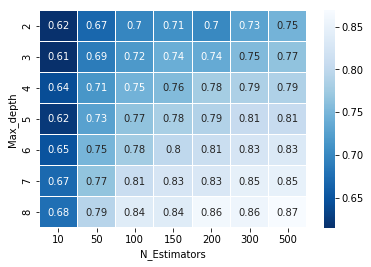

In [188]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':train_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()

#### CV auc

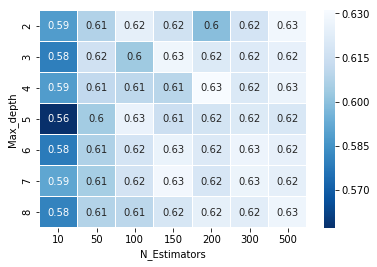

In [189]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':cv_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()


<h2>Hyperparameter tuning to find the best K</h2>

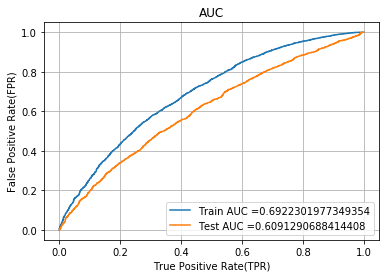

In [191]:
from sklearn.metrics import roc_curve, auc, roc_auc_score


neigh = RandomForestClassifier( criterion='gini',
            max_depth=2, n_estimators=100, n_jobs=-1,)
neigh.fit(Xtrain1, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(Xtrain1)[:,1]    
y_test_pred = neigh.predict_proba(Xtest1)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.40481102439398653 for threshold 0.846
[[1482  782]
 [4745 7690]]
the maximum value of tpr*(1-fpr) 0.40481102439398653 for threshold 0.846


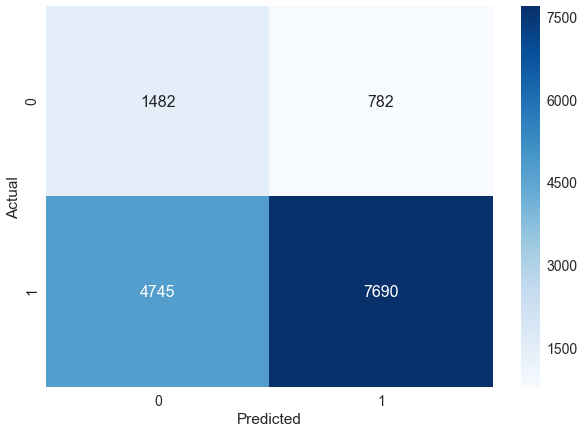

In [192]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


import seaborn as sn
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')



Test confusion matrix
the maximum value of tpr*(1-fpr) 0.33622274757026527 for threshold 0.847
[[1037  349]
 [4632 2982]]
the maximum value of tpr*(1-fpr) 0.33622274757026527 for threshold 0.847


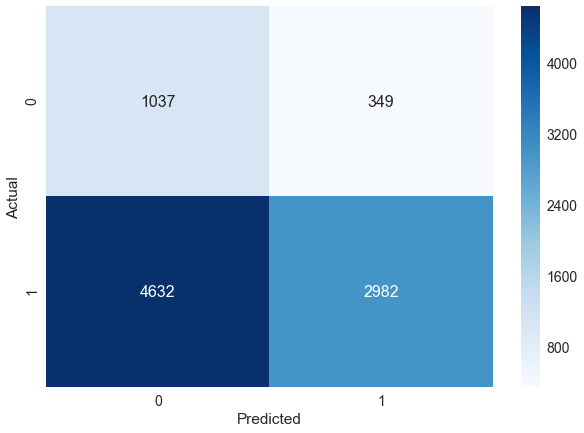

In [193]:
def predicttest(proba, threshould, fpr, tpr):
    
   # t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", threshould)
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

t=0.847
print("Test confusion matrix")
print(confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr)))
data = confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

<h2>2.1.2 GBDT

In [194]:
from xgboost import XGBClassifier
#xgb = XGBClassifier()

In [241]:
n_estimators = [10, 50, 100, 150, 200, 300, 500]
max_depth =  [2,3,4,5,6,7,8]
train_auc = []
cv_auc = []
d = []
m_s = []

for i in n_estimators:
    for j in max_depth:
        bst =XGBClassifier(n_estimators = i,max_depth = j)
        bst.fit(Xtrain1,Y_train)
        y_train_pred = bst.predict_proba(Xtrain1)[:,1]
        y_cv_pred = bst.predict_proba(Xcv1)[:,1]
        train_auc.append(roc_auc_score(Y_train,y_train_pred))
        cv_auc.append(roc_auc_score(Y_cv,y_cv_pred))
        
        
        m_s.append(j)
        d.append(i)
        




#### Train AUC

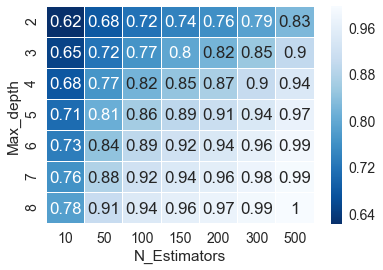

In [197]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':train_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()

#### CV auc

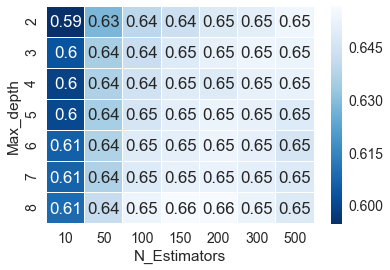

In [196]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':cv_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()


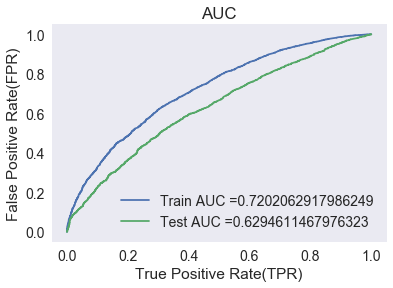

In [198]:
neigh = XGBClassifier(max_depth = 3,n_estimators = 50) 
neigh.fit(Xtrain1, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(Xtrain1)[:,1]    
y_test_pred = neigh.predict_proba(Xtest1)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.43504584262191665 for threshold 0.835
[[1548  716]
 [4523 7912]]
the maximum value of tpr*(1-fpr) 0.43504584262191665 for threshold 0.835


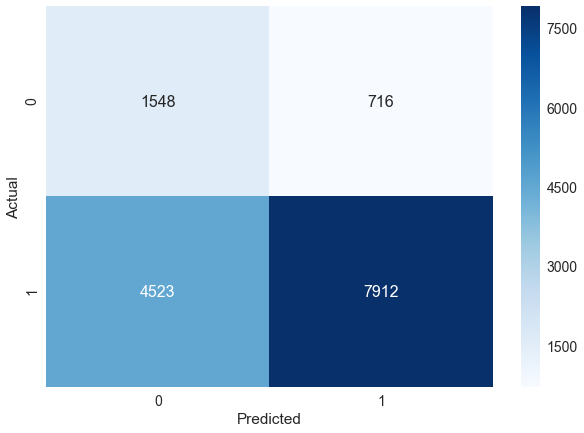

In [199]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


import seaborn as sn
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')



Test confusion matrix
the maximum value of tpr*(1-fpr) 0.35799635819336373 for threshold 0.835
[[ 851  535]
 [3182 4432]]
the maximum value of tpr*(1-fpr) 0.35799635819336373 for threshold 0.835


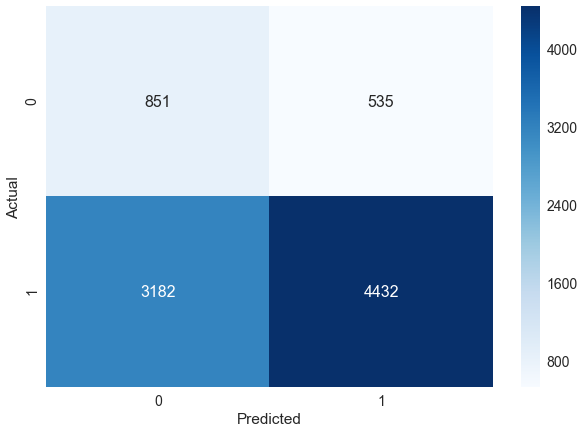

In [200]:
def predicttest(proba, threshould, fpr, tpr):
    
   # t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", threshould)
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

t=0.835
print("Test confusion matrix")
print(confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr)))
data = confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

<h2>2.2 rf on TFIDF + Categorical,Numerical features</h2>

In [242]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
X_train_final_set_two = hstack((catatrain,catrtrain,subcatatrain,subcatrtrain,ssatrain,ssrtrain,teacherpretraina,teacherpretrainr,gradeatrain,gradertrain,text_tfidf_train,title_tfidf_train,X_train_price_standard,X_train_project_standard))
Xtrain2 = X_train_final_set_two.tocsr()
X_test_final_set_two = hstack((catatest,catrtest,subcatatest,subcatrtest,ssatest,ssrtest,teacherpretesta,teacherpretestr,gradeatest,gradertest,text_tfidf_test,title_tfidf_test,X_test_price_standard,X_test_project_standard))
Xtest2 = X_test_final_set_two.tocsr()
X_cv_final_set_two = hstack((catacv,catrcv,subcatacv,subcatrcv,ssacv,ssrcv,teacherprecva,teacherprecvr,gradeacv,gradercv,text_tfidf_cv,title_tfidf_cv,X_cv_price_standard,X_cv_project_standard))
Xcv2 = X_cv_final_set_two.tocsr()

In [243]:
n_estimators = [10, 50, 100, 150, 200, 300, 500]
max_depth =  [2,3,4,5,6,7,8]
train_auc = []
cv_auc = []
d = []
m_s = []

for i in n_estimators:
    for j in max_depth:
        dt = RandomForestClassifier(criterion = 'gini' ,n_estimators = i,max_depth = j)
        dt.fit(Xtrain2,Y_train)
        y_train_pred = dt.predict_proba(Xtrain2)[:,1]
        y_cv_pred = dt.predict_proba(Xcv2)[:,1]
        train_auc.append(roc_auc_score(Y_train,y_train_pred))
        cv_auc.append(roc_auc_score(Y_cv,y_cv_pred))
        
        
        m_s.append(j)
        d.append(i)
        



#### Train AUC

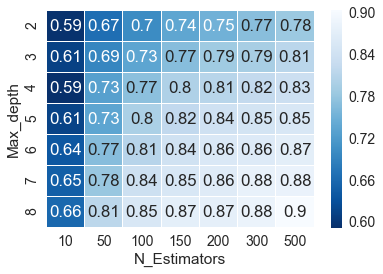

In [244]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':train_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()

#### CV Auc

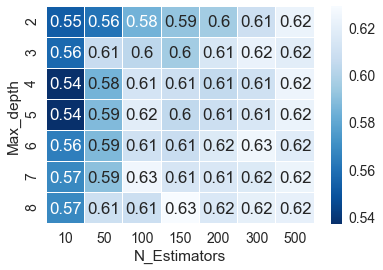

In [245]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':cv_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()

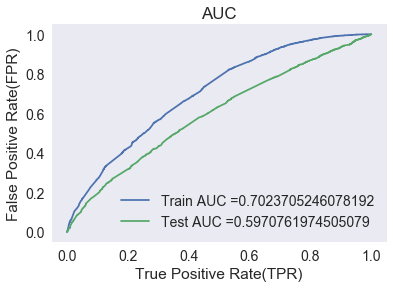

In [246]:
from sklearn.metrics import roc_curve, auc, roc_auc_score


neigh = RandomForestClassifier( criterion='gini',
            max_depth=3, n_estimators=50, n_jobs=-1,)
neigh.fit(Xtrain2, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(Xtrain2)[:,1]    
y_test_pred = neigh.predict_proba(Xtest2)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4076881763971237 for threshold 0.846
[[1398  866]
 [4225 8210]]
the maximum value of tpr*(1-fpr) 0.4076881763971237 for threshold 0.846


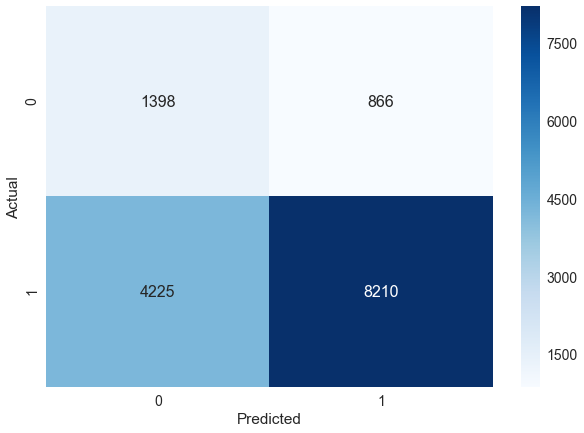

In [247]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


import seaborn as sn
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')



Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3277004348714357 for threshold 0.846
[[ 870  516]
 [3677 3937]]
the maximum value of tpr*(1-fpr) 0.3277004348714357 for threshold 0.846


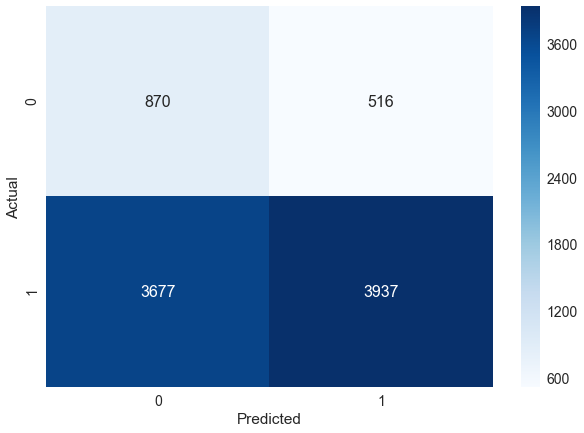

In [248]:
def predicttest(proba, threshould, fpr, tpr):
    
   # t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", threshould)
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

t=0.846
print("Test confusion matrix")
print(confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr)))
data = confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

### GBDT

In [208]:
n_estimators = [10, 50, 100, 150, 200, 300, 500]
max_depth =  [2,3,4,5,6,7,8]
train_auc = []
cv_auc = []
d = []
m_s = []

for i in n_estimators:
    for j in max_depth:
        bst =XGBClassifier(n_estimators = i,max_depth = j)
        bst.fit(Xtrain2,Y_train)
        y_train_pred = bst.predict_proba(Xtrain2)[:,1]
        y_cv_pred = bst.predict_proba(Xcv2)[:,1]
        train_auc.append(roc_auc_score(Y_train,y_train_pred))
        cv_auc.append(roc_auc_score(Y_cv,y_cv_pred))
        
        
        m_s.append(j)
        d.append(i)
        




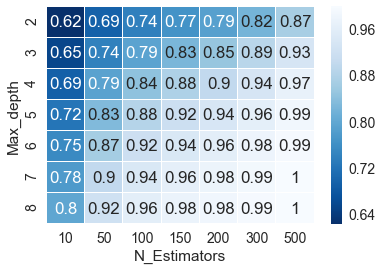

In [209]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':train_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()

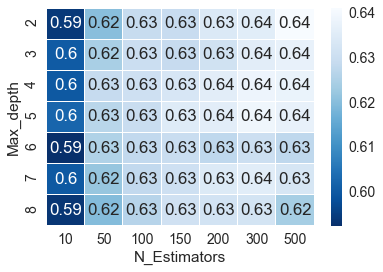

In [210]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':cv_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()

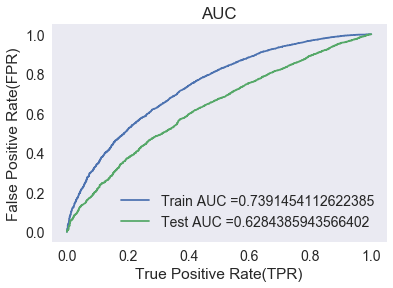

In [211]:
neigh = XGBClassifier(max_depth = 3,n_estimators = 50) 
neigh.fit(Xtrain2, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(Xtrain2)[:,1]    
y_test_pred = neigh.predict_proba(Xtest2)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.44860411951334217 for threshold 0.829
[[1420  844]
 [3541 8894]]
the maximum value of tpr*(1-fpr) 0.44860411951334217 for threshold 0.829


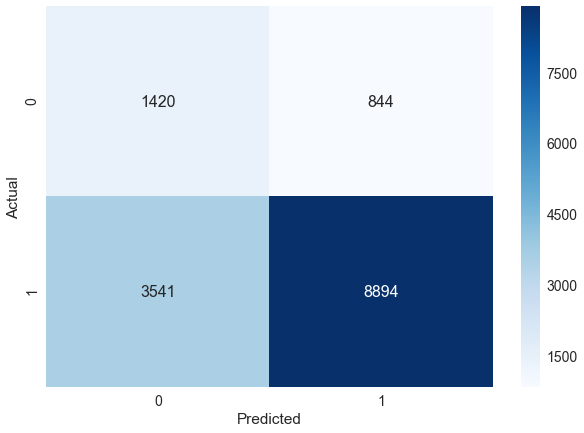

In [212]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


import seaborn as sn
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')



Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3582885024965403 for threshold 0.829
[[ 728  658]
 [2626 4988]]
the maximum value of tpr*(1-fpr) 0.3582885024965403 for threshold 0.829


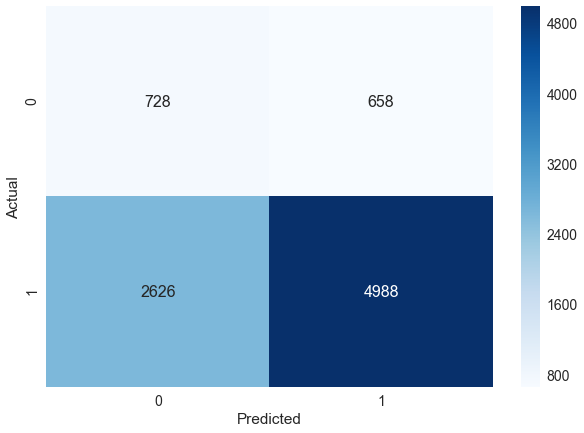

In [213]:
def predicttest(proba, threshould, fpr, tpr):
    
   # t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", threshould)
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

t=0.829
print("Test confusion matrix")
print(confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr)))
data = confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

<h2>2.3 rf on W2V + Categorical,Numerical features</h2>



In [214]:


Xtrain3 = np.hstack((catatrain,catrtrain,subcatatrain,subcatrtrain,ssatrain,ssrtrain,teacherpretraina,teacherpretrainr,gradeatrain,gradertrain,avg_w2v_vectors_train,avg_w2v_proj_train,X_train_price_standard,X_train_project_standard))
#Xtrain3 = X_train_final_set_three.tocsr()'''
Xtest3 = np.hstack((catatest,catrtest,subcatatest,subcatrtest,ssatest,ssrtest,teacherpretesta,teacherpretestr,gradeatest,gradertest,avg_w2v_vectors_test,avg_w2v_proj_test,X_test_price_standard,X_test_project_standard))
#Xtest3 = X_test_final_set_three.tocsr()'''
Xcv3 = np.hstack((catacv,catrcv,subcatacv,subcatrcv,ssacv,ssrcv,teacherprecva,teacherprecvr,gradeacv,gradercv,avg_w2v_vectors_cv,avg_w2v_proj_cv,X_cv_price_standard,X_cv_project_standard))
#Xcv3 = X_cv_final_set_three.tocsr()

In [215]:
n_estimators = [10, 50, 100, 150, 200, 300, 500]
max_depth =  [2,3,4,5,6,7,8]
train_auc = []
cv_auc = []
d = []
m_s = []

for i in n_estimators:
    for j in max_depth:
        dt = RandomForestClassifier(criterion = 'gini' ,n_estimators = i,max_depth = j)
        dt.fit(Xtrain3,Y_train)
        y_train_pred = dt.predict_proba(Xtrain3)[:,1]
        y_cv_pred = dt.predict_proba(Xcv3)[:,1]
        train_auc.append(roc_auc_score(Y_train,y_train_pred))
        cv_auc.append(roc_auc_score(Y_cv,y_cv_pred))
        
        
        m_s.append(j)
        d.append(i)
        



#### Train auc

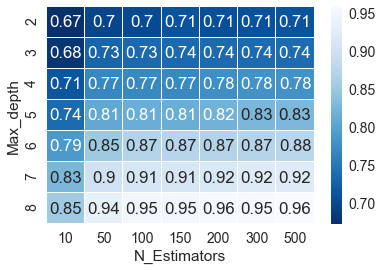

In [216]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':train_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()

#### CV auc

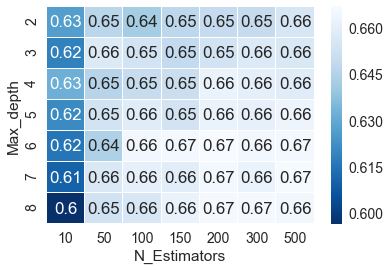

In [217]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':cv_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()

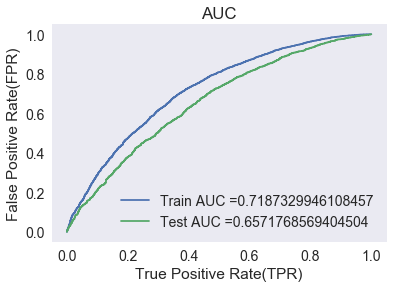

In [218]:
from sklearn.metrics import roc_curve, auc, roc_auc_score


neigh = RandomForestClassifier( criterion='gini',
            max_depth=3, n_estimators=50, n_jobs=-1,)
neigh.fit(Xtrain3, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(Xtrain3)[:,1]    
y_test_pred = neigh.predict_proba(Xtest3)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.44244204137131465 for threshold 0.84
[[1440  824]
 [3785 8650]]
the maximum value of tpr*(1-fpr) 0.44244204137131465 for threshold 0.84


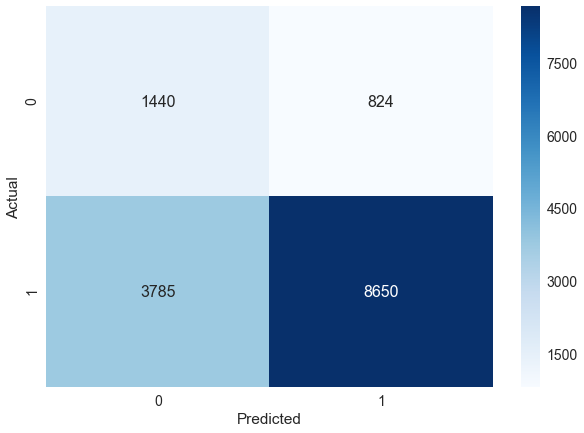

In [219]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


import seaborn as sn
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')



Test confusion matrix
the maximum value of tpr*(1-fpr) 0.37819942075261226 for threshold 0.84
[[ 771  615]
 [2444 5170]]
the maximum value of tpr*(1-fpr) 0.37819942075261226 for threshold 0.84


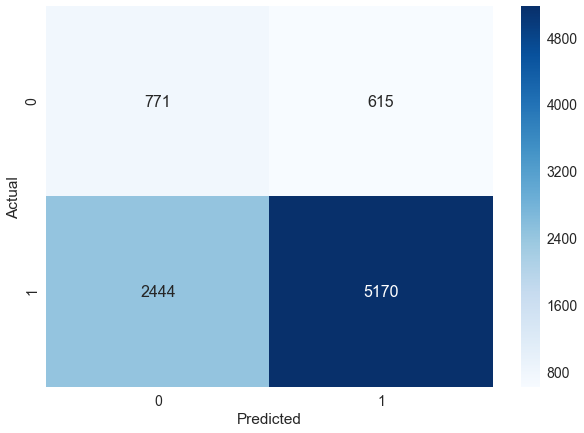

In [220]:
def predicttest(proba, threshould, fpr, tpr):
    
   # t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", threshould)
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

t=0.84
print("Test confusion matrix")
print(confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr)))
data = confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

## GBDT

In [221]:
n_estimators = [10, 50, 100, 150, 200, 300, 500]
max_depth =  [2,3,4,5,6,7,8]
train_auc = []
cv_auc = []
d = []
m_s = []

for i in n_estimators:
    for j in max_depth:
        bst =XGBClassifier(n_estimators = i,max_depth = j)
        bst.fit(Xtrain3,Y_train)
        y_train_pred = bst.predict_proba(Xtrain3)[:,1]
        y_cv_pred = bst.predict_proba(Xcv3)[:,1]
        train_auc.append(roc_auc_score(Y_train,y_train_pred))
        cv_auc.append(roc_auc_score(Y_cv,y_cv_pred))
        
        
        m_s.append(j)
        d.append(i)
        




#### Train Auc

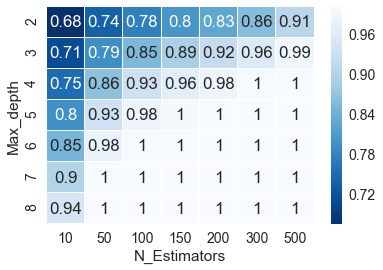

In [222]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':train_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()

#### Cv auc

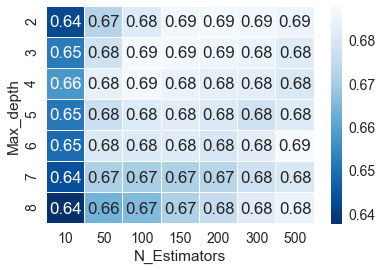

In [223]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':cv_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()

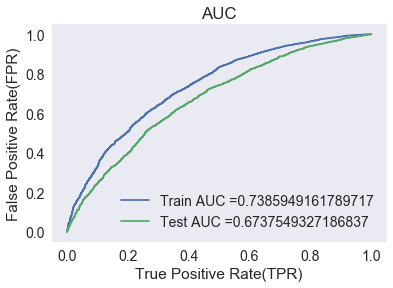

In [224]:
neigh = XGBClassifier(max_depth = 2,n_estimators = 50) 
neigh.fit(Xtrain3, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(Xtrain3)[:,1]    
y_test_pred = neigh.predict_proba(Xtest3)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.45390759866500147 for threshold 0.835
[[1478  786]
 [3789 8646]]
the maximum value of tpr*(1-fpr) 0.45390759866500147 for threshold 0.835


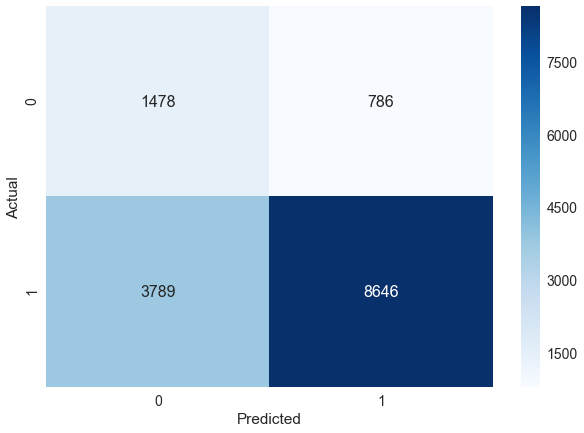

In [225]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


import seaborn as sn
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')



Test confusion matrix
the maximum value of tpr*(1-fpr) 0.39629379463894826 for threshold 0.835
[[ 835  551]
 [2645 4969]]
the maximum value of tpr*(1-fpr) 0.39629379463894826 for threshold 0.835


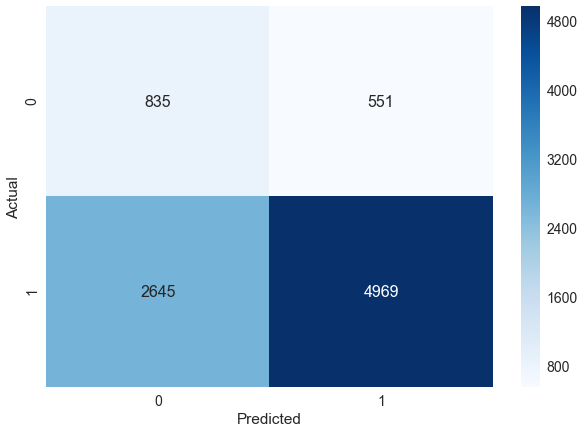

In [226]:
def predicttest(proba, threshould, fpr, tpr):
    
   # t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", threshould)
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

t=0.835
print("Test confusion matrix")
print(confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr)))
data = confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

### 2.4 rf on TFIDF-W2V + Categorical,Numerical features

In [227]:
Xtrain4 = np.hstack((catatrain,catrtrain,subcatatrain,subcatrtrain,ssatrain,ssrtrain,teacherpretraina,teacherpretrainr,gradeatrain,gradertrain,tfidf_w2v_vectors_train,tfidf_w2v_proj_train,X_train_price_standard,X_train_project_standard))

Xtest4 = np.hstack((catatest,catrtest,subcatatest,subcatrtest,ssatest,ssrtest,teacherpretesta,teacherpretestr,gradeatest,gradertest,tfidf_w2v_vectors_test,tfidf_w2v_proj_test,X_test_price_standard,X_test_project_standard))
Xcv4 = np.hstack((catacv,catrcv,subcatacv,subcatrcv,ssacv,ssrcv,teacherprecva,teacherprecvr,gradeacv,gradercv,tfidf_w2v_vectors_cv,tfidf_w2v_proj_cv,X_cv_price_standard,X_cv_project_standard))


In [228]:
n_estimators = [10, 50, 100, 150, 200, 300, 500]
max_depth =  [2,3,4,5,6,7,8]
train_auc = []
cv_auc = []
d = []
m_s = []

for i in n_estimators:
    for j in max_depth:
        dt = RandomForestClassifier(criterion = 'gini' ,n_estimators = i,max_depth = j)
        dt.fit(Xtrain4,Y_train)
        y_train_pred = dt.predict_proba(Xtrain4)[:,1]
        y_cv_pred = dt.predict_proba(Xcv4)[:,1]
        train_auc.append(roc_auc_score(Y_train,y_train_pred))
        cv_auc.append(roc_auc_score(Y_cv,y_cv_pred))
        
        
        m_s.append(j)
        d.append(i)
        



#### Train AUC

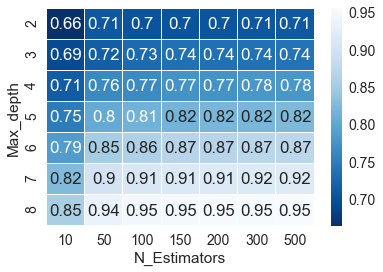

In [229]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':train_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()

#### CV Auc

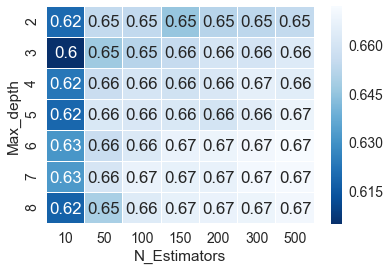

In [230]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':cv_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()

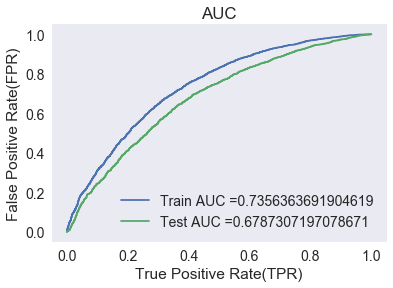

In [231]:
from sklearn.metrics import roc_curve, auc, roc_auc_score


neigh = RandomForestClassifier( criterion='gini',
            max_depth=3, n_estimators=200, n_jobs=-1,)
neigh.fit(Xtrain4, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(Xtrain4)[:,1]    
y_test_pred = neigh.predict_proba(Xtest4)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4583978028504406 for threshold 0.84
[[1540  724]
 [4055 8380]]
the maximum value of tpr*(1-fpr) 0.4583978028504406 for threshold 0.84


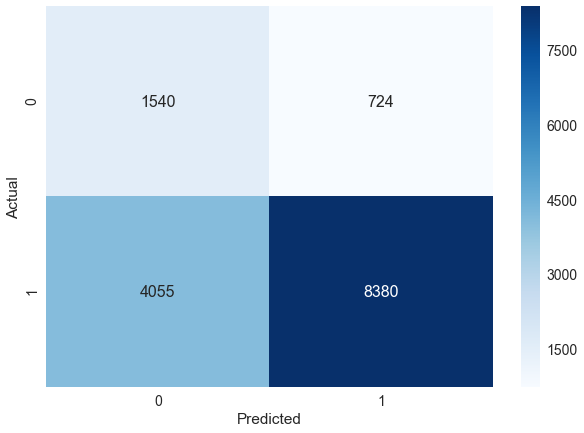

In [232]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


import seaborn as sn
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')



Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4079088759939824 for threshold 0.84
[[ 874  512]
 [2696 4918]]
the maximum value of tpr*(1-fpr) 0.4079088759939824 for threshold 0.84


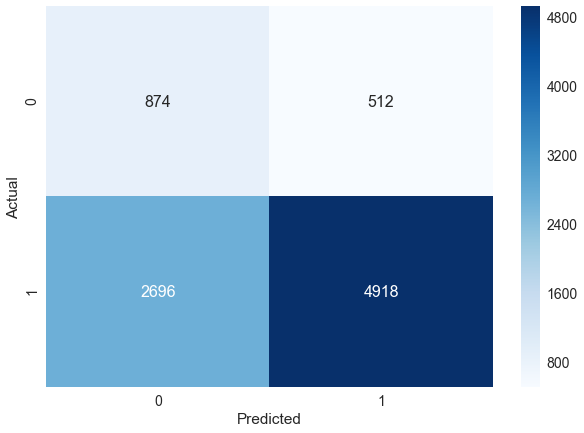

In [233]:
def predicttest(proba, threshould, fpr, tpr):
    
   # t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", threshould)
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

t=0.84
print("Test confusion matrix")
print(confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr)))
data = confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')


## GBDT 

In [234]:
n_estimators = [10, 50, 100, 150, 200, 300, 500]
max_depth =  [2,3,4,5,6,7,8]
train_auc = []
cv_auc = []
d = []
m_s = []

for i in n_estimators:
    for j in max_depth:
        bst =XGBClassifier(n_estimators = i,max_depth = j)
        bst.fit(Xtrain4,Y_train)
        y_train_pred = bst.predict_proba(Xtrain4)[:,1]
        y_cv_pred = bst.predict_proba(Xcv4)[:,1]
        train_auc.append(roc_auc_score(Y_train,y_train_pred))
        cv_auc.append(roc_auc_score(Y_cv,y_cv_pred))
        
        
        m_s.append(j)
        d.append(i)
        




#### Train auc

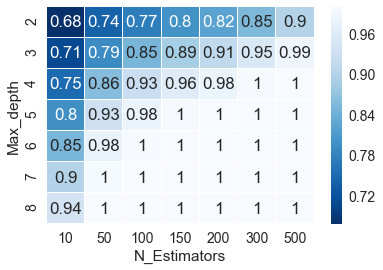

In [235]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':train_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()

#### CV Auc

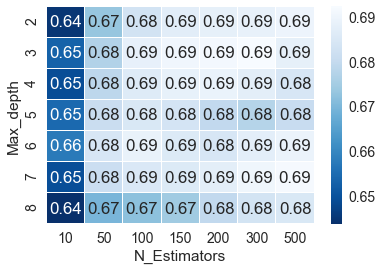

In [236]:
ln = pd.DataFrame({'Max_depth':m_s,'N_Estimators':d,'Value':cv_auc})
result = ln.pivot(index='Max_depth', columns='N_Estimators', values='Value')
sns.heatmap(result, annot=True, cmap='Blues_r',linewidths = 0.1)
plt.show()

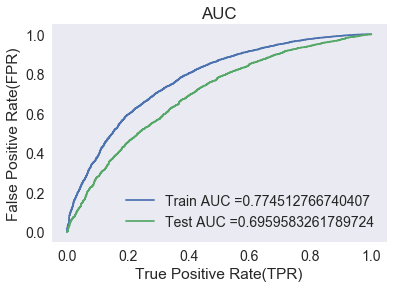

In [237]:
neigh = XGBClassifier(max_depth = 2,n_estimators = 100) 
neigh.fit(Xtrain4, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(Xtrain4)[:,1]    
y_test_pred = neigh.predict_proba(Xtest4)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.49685704888032606 for threshold 0.834
[[1601  663]
 [3698 8737]]
the maximum value of tpr*(1-fpr) 0.49685704888032606 for threshold 0.834


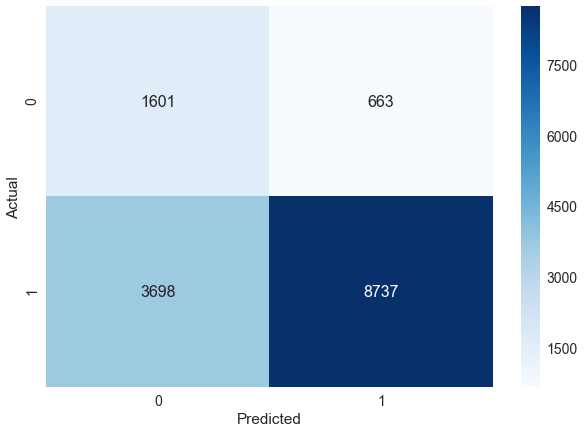

In [238]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


import seaborn as sn
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')



Test confusion matrix
the maximum value of tpr*(1-fpr) 0.41705811918577873 for threshold 0.834
[[ 866  520]
 [2546 5068]]
the maximum value of tpr*(1-fpr) 0.41705811918577873 for threshold 0.834


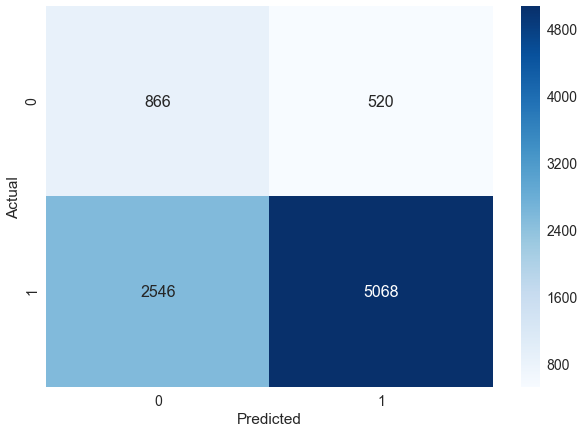

In [239]:
def predicttest(proba, threshould, fpr, tpr):
    
   # t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", threshould)
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

t=0.834
print("Test confusion matrix")
print(confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr)))
data = confusion_matrix(Y_test, predicttest(y_test_pred, t, test_fpr, test_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

<h1>3. Conclusions</h1>

In [249]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable

In [250]:
x = PrettyTable()

x.field_names = ["Method", "AUC - Test data"]

x.add_row(["BOW - RF", 0.60])
x.add_row(["BOW - GBDT", 0.62])
x.add_row(["TFIDF - RF", 0.59])
x.add_row(["TFIDF - GBDT", 0.62])
x.add_row(["W2V - RF", 0.65])
x.add_row(["W2V - GBDT", 0.67])
x.add_row(["W2V-TFIDF(RF)", 0.67])
x.add_row(["W2V-TFIDF(GBDT)", 0.69])


print(x)

+-----------------+-----------------+
|      Method     | AUC - Test data |
+-----------------+-----------------+
|     BOW - RF    |       0.6       |
|    BOW - GBDT   |       0.62      |
|    TFIDF - RF   |       0.59      |
|   TFIDF - GBDT  |       0.62      |
|     W2V - RF    |       0.65      |
|    W2V - GBDT   |       0.67      |
|  W2V-TFIDF(RF)  |       0.67      |
| W2V-TFIDF(GBDT) |       0.69      |
+-----------------+-----------------+
